In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<ol>
<li>Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.</li>
<li>Постройте график по числу поездок по дате и времени.</li>
<li>Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.</li>
<li>Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.</li>
<li>Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.</li>
<li>Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.</li>
<li>Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.</li>
<li>Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.</li>
</ol>

<h4>Описание данных</h4>
<li><b>timestamp</b> – дата и время (точность до часа)</li>
<li><b>cnt</b> – количество аренд велосипедов за этот час</li>
<li><b>t1</b> – температура, в С</li>
<li><b>t2</b> – температура "ощущается как", в С </li>
<li><b>hum</b> – влажность (%)</li>
<li><b>wind_speed</b> – скорость ветра, км/ч</li>
<li><b>weather_code – погодные условия:</li>
        <li>    1 – ясно (SKC)</li>
        <li>    2 – преимущественно ясно / встречаются отдельные облака (SCT)</li>
        <li>    3 – облачно / значительные облака (BKN)</li>
        <li>    4 – пасмурно (OVC)</li>
        <li>    7 – небольшой дождь Rain/ light Rain shower/ Light rain</li>
        <li>    10 – дождь с грозой</li>
        <li>    26 – снегопад</li>
        <li>    94 – ледяной туман (да, такое бывает!)</li>
<li><b>isholiday</b> – является ли день праздником (1 – праздник, 0 – нет)</li>
<li><b>isweekend</b> –  является ли день выходным (1 – выходной, 0 – нет)</li>
<li><b>season</b> – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)</li>

In [2]:
bike_share = pd.read_csv('london.csv')

In [7]:
bike_share.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [6]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [5]:
bike_share.timestamp = pd.to_datetime(bike_share.timestamp)

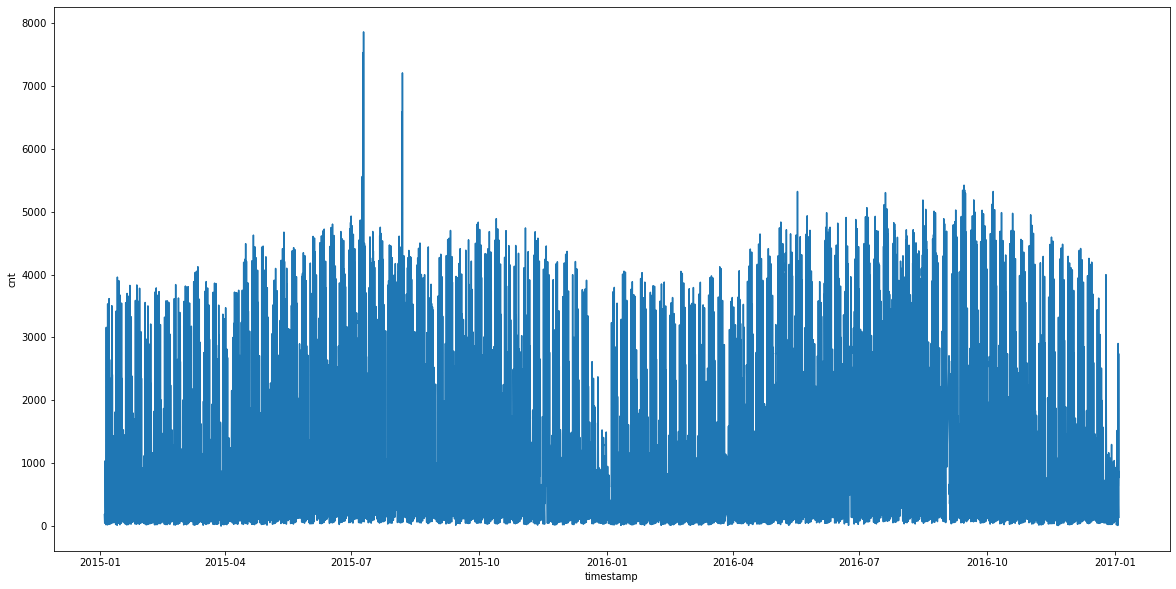

In [9]:
plt.figure(figsize=(20,10))
sns.lineplot(x='timestamp', y='cnt', data=bike_share)

In [18]:
bike_share_per_day = bike_share.sort_values('timestamp').set_index('timestamp').resample(rule='D').cnt.sum().reset_index()

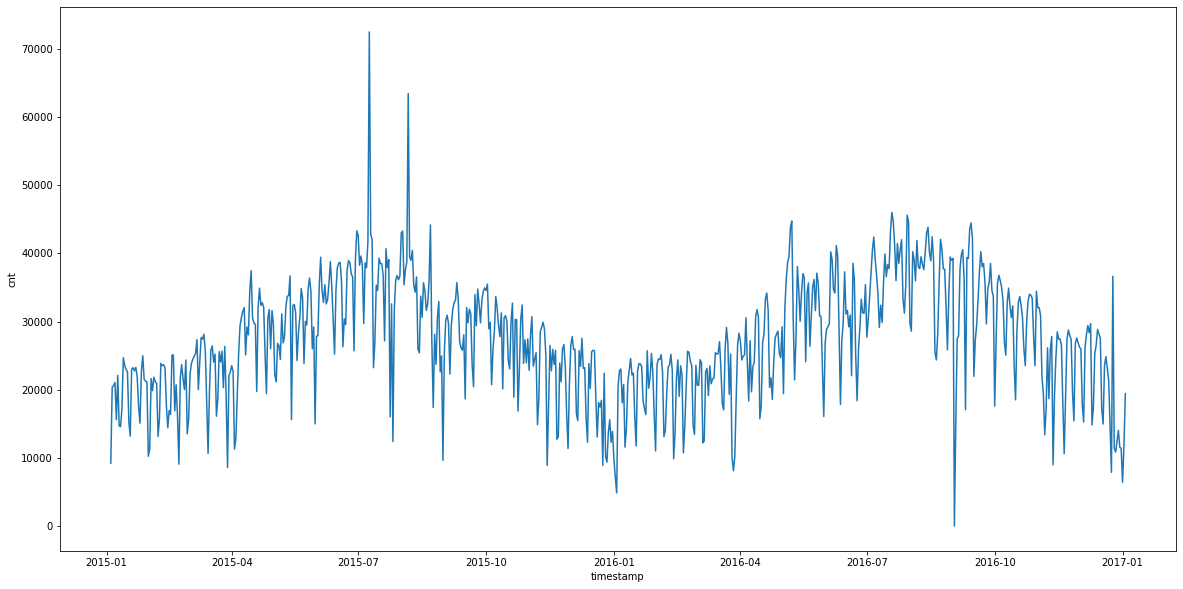

In [20]:
plt.figure(figsize=(20,10))
sns.lineplot(x='timestamp', y='cnt', data=bike_share_per_day)

In [22]:
bike_share_per_day['rolling_3_days_mean'] = bike_share_per_day.cnt.rolling(window=3).mean()

In [25]:
bike_share_per_day.query('timestamp == "2015-07-09"')

,timestamp,cnt,rolling_3_days_mean
186,2015-07-09,72504,50705.0


In [26]:
bike_share_per_day['rolling_diff'] = bike_share_per_day.cnt - bike_share_per_day.rolling_3_days_mean

In [30]:
bike_share_per_day_std = np.std(bike_share_per_day.rolling_diff)

In [31]:
bike_share_per_day_std

4558.586641117938

In [32]:
bike_share_per_day['upper_bound'] = bike_share_per_day.rolling_3_days_mean + 2.576 * bike_share_per_day_std

In [33]:
bike_share_per_day['lower_bound'] = bike_share_per_day.rolling_3_days_mean - 2.576 * bike_share_per_day_std

In [34]:
bike_share_per_day.tail()

,timestamp,cnt,rolling_3_days_mean,rolling_diff,upper_bound,lower_bound
726,2016-12-30,11566,12682.000000,-1116.000000,24424.919188,939.080812
727,2016-12-31,11424,12347.333333,-923.333333,24090.252521,604.414146
728,2017-01-01,6421,9803.666667,-3382.666667,21546.585854,-1939.252521
729,2017-01-02,11823,9889.333333,1933.666667,21632.252521,-1853.585854
730,2017-01-03,19436,12560.000000,6876.000000,24302.919188,817.080812


In [44]:
bike_share_per_day.query('cnt > upper_bound') #186 london underground strike

,timestamp,cnt,rolling_3_days_mean,rolling_diff,upper_bound,lower_bound
186,2015-07-09,72504,50705.000000,21799.000000,62447.919188,38962.080812
214,2015-08-06,63468,46627.333333,16840.666667,58370.252521,34884.414146
609,2016-09-04,27512,14259.000000,13253.000000,26001.919188,2516.080812
721,2016-12-25,36653,19650.666667,17002.333333,31393.585854,7907.747479


In [37]:
bike_share_per_day.query('cnt < lower_bound')

,timestamp,cnt,rolling_3_days_mean,rolling_diff,upper_bound,lower_bound
130,2015-05-14,15609,28709.333333,-13100.333333,40452.252521,16966.414146
189,2015-07-12,23240,36036.666667,-12796.666667,47779.585854,24293.747479
201,2015-07-24,16034,31013.666667,-14979.666667,42756.585854,19270.747479
232,2015-08-24,17400,29529.333333,-12129.333333,41272.252521,17786.414146
314,2015-11-14,8898,21037.333333,-12139.333333,32780.252521,9294.414146
607,2016-09-02,0,26086.333333,-26086.333333,37829.252521,14343.414146
615,2016-09-10,17080,31262.000000,-14182.000000,43004.919188,19519.080812
621,2016-09-16,21967,36193.333333,-14226.333333,47936.252521,24450.414146
678,2016-11-12,8990,20878.000000,-11888.000000,32620.919188,9135.080812


In [43]:
bike_share.query('timestamp == "2016-09-02"')

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
